In [7]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import sys

In [8]:
root = "."
imagepath = f"{root}/test-images/sabac.jpg"

In [9]:
# Funkcija koja će naći 4 ivične tačke binarizovane slike tablice
def getpoints(image):
    # Definicija tačaka (topleft, topright, bottomleft, bottomright)
    tl = None
    tr = None
    bl = None
    br = None

    # Kao primer, uzmimo da je `width = 11` i `height = 11`
    width, height = image.shape

    for i in range(0, width, 1):
        for j in range(0, min(i + 1, height), 1):
            if tl is None:
                # Kada je `x = i - j`, `x` ide od `0` do `10` (inkluzivno)
                x = i - j
                # Kada je `y = j`, `y` ide od `0` do `10`
                y = j

                if image[y][x] != 0:
                    tl = (x, y)

            if tr is None:
                x = j - i + height - 1
                y = j

                if image[y][x] != 0:
                    tr = (x, y)

            if bl is None:
                x = i - j
                y = width - j - 1

                if image[y][x] != 0:
                    bl = (x, y)

            if br is None:
                # Kada je `x = j - i + height - 1`, `x` ide od `10` do `0`
                x = j - i + height - 1
                # Kada je `y = width - j - 1`, `y` ide od `10` do `0`
                y = width - j - 1

                if image[y][x] != 0:
                    br = (x, y)
            
            # Ako su sve tačke definisane, prestaće da traži
            if tl is not None and tr is not None and bl is not None and br is not None:
                break
    
    # Vraćamo dobijene tačke
    return [tl, tr, bl, br]

(168, 299)


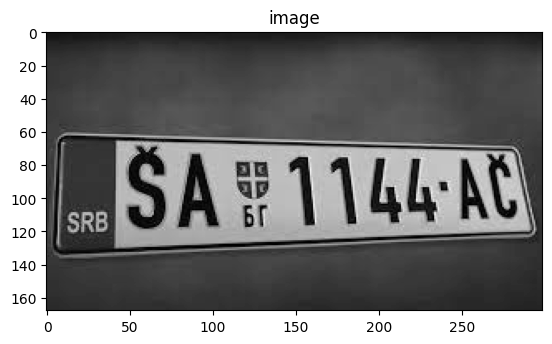

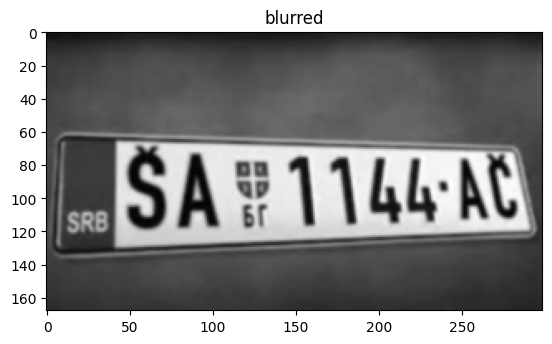

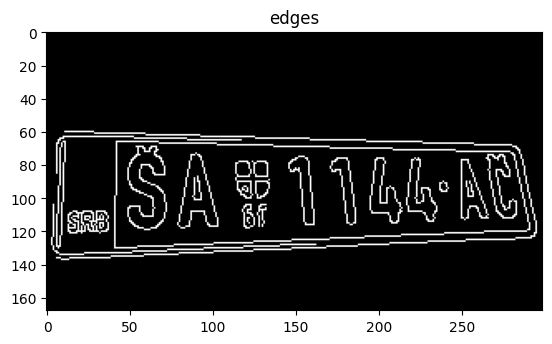

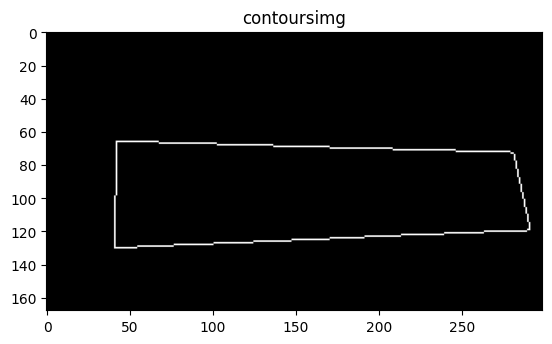

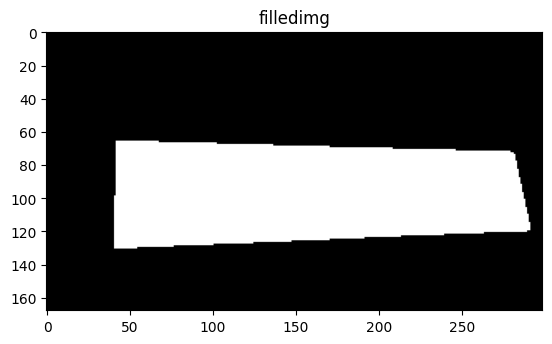

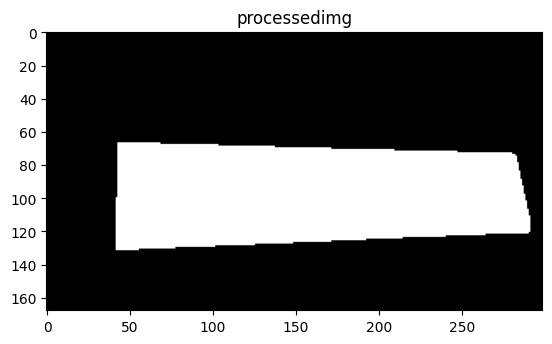

[(43, 67), (282, 74), (42, 131), (290, 121)]


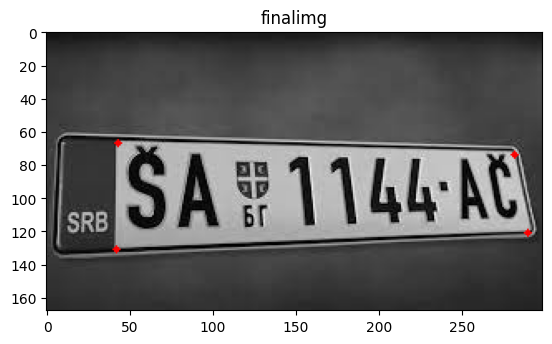

In [14]:
image = cv2.cvtColor(cv2.imread(imagepath), cv2.COLOR_BGR2GRAY)

print(image.shape)
width, height = image.shape

plt.imshow(image, cmap="gray")
plt.title("image")
plt.show()

blurred = cv2.GaussianBlur(image, (5, 5), 1)
plt.imshow(blurred, cmap="gray")
plt.title("blurred")
plt.show()

edges = cv2.Canny(blurred, 255, 255 / 3)

plt.imshow(edges, cmap="gray")
plt.title("edges")
plt.show()

# Trenutno ne gledamo hijerarhiju kontura (korisno za filtriranje bitnih kontura).
contours, _ = cv2.findContours(edges, 
    cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

# Sortiranje kontura po površini, tako da je prva kontura najveća
contours = sorted(contours, key=cv2.contourArea, reverse=True)
contour = contours[0]

# Pravimo binarnu sliku koja sadrži sve tačke svih kontura
contoursimg = np.zeros([width, height, 1], dtype="uint8")

for i, [[x, y]] in enumerate(contour):
    contoursimg[y,x]=255

# Vizuelizacija kontura
plt.imshow(contoursimg, cmap="gray")
plt.title("contoursimg")
plt.show()

# Popunjavanje konture radi mnogo lakšeg filtriranja nebitnih kontura
filledimg = cv2.fillPoly(contoursimg.copy(), pts=[contour], color=(255,255,255))

# Vizuelizacija popunjene konture
plt.imshow(filledimg, cmap="gray")
plt.title("filledimg")
plt.show()

# Definisanje "jačine" erozije i dilatacije za sledeći korak
kernel = np.ones([10, 10])

# Prvo vršimo veoma jaku eroziju da se otarasimo nebitnih kontura
processedimg = cv2.erode(filledimg.copy(), kernel)
# A zatim dilataciju iste jačine kako bismo dobili samo popunjenu konturu tablice
processedimg = cv2.dilate(processedimg, kernel)

# Vizuelizacija filtrirane slike
plt.imshow(processedimg, cmap="gray")
plt.title("processedimg")
plt.show()

# Nalaženje 4 ivičnih tačaka tablice
points = getpoints(processedimg)
print(points)

# Prikazivanje samih tačaka na binarnoj slici
finalimg = cv2.cvtColor(image.copy(), cv2.COLOR_GRAY2RGB)

for [x, y] in points:
    cv2.circle(finalimg, (x, y), 2, (255, 0, 0), -1)

plt.imshow(np.array(finalimg))
plt.title("finalimg")
plt.show()